# Rudimentary t-SNE Pipeline Classification

Authors: Athan Zhang and Jean Lavgine du Cadet

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.linear_model import LogisticRegression as LR
from sklearn.svm import SVC as SVM
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split

from tsne import tsne

SEED = 1234
np.random.seed=(SEED)

Preprocessing the data using PCA...
Computing pairwise distances...
Computing P-values for point 0 of 2500...
Computing P-values for point 500 of 2500...
Computing P-values for point 1000 of 2500...
Computing P-values for point 1500 of 2500...
Computing P-values for point 2000 of 2500...
Mean value of sigma: 2.573319
Iteration 10: error is 22.303630
Iteration 20: error is 20.206328
Iteration 30: error is 17.034066
Iteration 40: error is 16.029501
Iteration 980: error is 0.976397
Iteration 990: error is 0.976125
Iteration 1000: error is 0.975861


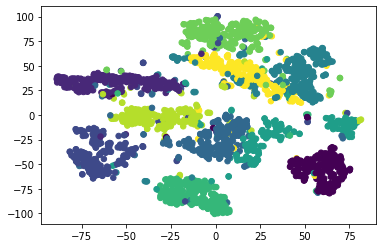

In [76]:
# MNIST Data
mnist_data = np.loadtxt("mnist2500_X.txt")
mnist_labels = np.loadtxt("mnist2500_labels.txt")
mnist_data_tsne = tsne(X, 2, 50, 30.0)
pylab.scatter(Y[:, 0], Y[:, 1], 30, labels)
pylab.show()

## No t-SNE Classification

In [80]:
X_train, X_test, y_train, y_test = train_test_split(mnist_data, mnist_labels, test_size=0.2, random_state=SEED)

classifiers = dict()
classifiers["DT"]   = DT(random_state=SEED)
classifiers["LR"]   = LR(random_state=SEED, max_iter=5000)
classifiers["SVM"]  = SVM(random_state=SEED)
classifiers["KNN"]  = KNN()

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    preds = clf.predict(X_test)
    print("MNIST with %s Acc:\t %s" % (name, round(accuracy_score(y_test, preds),3)))
    print("MNIST with %s F1:\t %s" % (name, round(f1_score(y_test, preds,average='weighted'),3)))

MNIST with DT Acc:	 0.75
MNIST with DT F1:	 0.75
MNIST with LR Acc:	 0.886
MNIST with LR F1:	 0.886
MNIST with SVM Acc:	 0.926
MNIST with SVM F1:	 0.926
MNIST with KNN Acc:	 0.894
MNIST with KNN F1:	 0.894


## With t-SNE Classification

In [81]:
X_train, X_test, y_train, y_test = train_test_split(mnist_data_tsne, mnist_labels, test_size=0.2, random_state=SEED)

classifiers = dict()
classifiers["DT"]   = DT(random_state=SEED)
classifiers["LR"]   = LR(random_state=SEED, max_iter=5000)
classifiers["SVM"]  = SVM(random_state=SEED)
classifiers["KNN"]  = KNN()

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    preds = clf.predict(X_test)
    print("MNIST with tsne+%s Acc:\t %s" % (name, round(accuracy_score(y_test, preds),3)))
    print("MNIST with tsne+%s F1:\t %s" % (name, round(f1_score(y_test, preds,average='weighted'),3)))

MNIST with tsne+DT Acc:	 0.9
MNIST with tsne+DT F1:	 0.901
MNIST with tsne+LR Acc:	 0.88
MNIST with tsne+LR F1:	 0.879
MNIST with tsne+SVM Acc:	 0.902
MNIST with tsne+SVM F1:	 0.901
MNIST with tsne+KNN Acc:	 0.92
MNIST with tsne+KNN F1:	 0.92
